# Transfert Learning par Bouveyron et Al. 2010

#### 1.1 - Contexte de l'étude de Bouveyron et Al. 2010

L'objectif de ce qui va suivre est d'exposer comment dans cette étude on parvient à estimer une transformation entre les fonctions de régressions des populations sources et cibles. L'exemple pris est celui d'une agence immobilière de la Cote Est des États-Unis qui dispose d'un  modèle de régression du prix du logement par rapport à plusieurs variables descriptives du logement, estimé en utilisant un large échantillon d'apprentissage. Par la suite cette entreprise souhaite conquérir le marché de la Côte Ouest et prévoit d'y ouvrir plusieurs agences. Pour cela, elle souhaite utiliser son modèle de régression existant sans investir beaucoup de temps et d'argent dans la collecte de nouvelles données sur le marché immobilier de cette région. Bien que l'entreprise reconnaisse que la relation entre les variables descriptives des logements et les prix de logement peut différer entre les côtes Est et Ouest, elle estime que ces différences ne sont pas grandement significatives. Nous expliciterons donc en quelques sorte comment ils parviennent à exhiber un modèle de transformation entre les modèles de régression des cotes Est et Ouest, bien que l'étude puisse s'étendre à plusieurs autres exemples. Il sera donc construit un estimateur par transfert de connaissance de la population de la cote Est (appelé population de référence ou source) vers celle de la cote Ouest (appelé population cible), en estimant la transformation entre les deux fonctions de régression.

#### 1.2 - Contexte théorique et motivation du transfert

Considérons l'échantillon $S=(\{x_1,y_1\},\{x_2,y_2\},.....,\{x_{N_S},y_{N_S}\})$ provenant d'une population source, iid du couple de variable $(X_S,Y_S)$, $X_S \in \mathbb{R}^{N_S \times D}$ avec $D$ le nombre de prédicteurs et $Y_S \in \mathbb{R}$. Comme précédemment, on considère le modèle de régression $y_S=f^{S}(x_S,\beta_{S}) + \epsilon_{S}$ avec $\epsilon_{S} \sim \mathcal{N}(0,\sigma_S^{2})$ où la fonction de régression $f^{S}(x_S,\beta_{S})$ est défini comme l'espérance conditionnelle $\mathbb{E}(Y \mid X_S=x_S)$. Elle peut être écrite sous la forme :  $f^{S}(x_S,\beta_{S})=\beta_{S}^{t} \Psi^S(x_S)$ avec $\Psi^S(x_S)=(1,\psi^S_{1}(x_S),....,\psi^S_{D}(x_S))^{t}$ une base de fonction de régression qui peut être par exemple l'identité, des fonctions splines ou des fonctions polynomiale. Dans le cas polynomiale on a que $\psi^S_i(x)=x^{i}$, se sera le cas dans l'exemple simulé en 2.4. Pour garder la similarité avec l'étude précédente, on peut également  écrire : $f^{S}(X_S,\beta_{S})=\beta_{S} X_S$.
Ensuite, en supposant qu'on a estimé la fonction de régression de la population source, un nouveau modèle de régression doit être ajuster sur un nouvel échantillon $T=(\{x_1,y_1\},\{x_2,y_2\},.....,\{x_{N_T},y_{N_T}\})$ mesuré sur le même type de variables explicatives mais provenant d'une population cible ($N_T$ est supposé être petit). La différence entre les populations sources et cibles peut être par exemple géographique(comme dans l'application du marché de l'immobilier des États-Unis) ou temporelle. Cependant la nature des deux populations doit être similaire.
Le modèle de régression de la population cible peut également être écrit: $Y_T=f^{T}(X_T,\beta_{T}) + \epsilon_{T}$ et sa fonction de régression $f^{T}(x_T,\beta_{T})=\beta_{T}^{t} \Psi^{T}(x_T)$ ou encore $f^{T}(X_T,\beta_{T})=\beta_{T} X_T$ avec $X_T \in \mathbb{R}^{N_T \times D_T}$ et $Y_T \in \mathbb{R}$. Par conséquent pour adapter notre modèle de régression existant d'une population de référence (source) à une nouvelle population (cible) nous allons construire une relation entre $f^{S}$ et $f^{T}$  puis trouver une estimation de cette relation.

#### 1.3 - Démarche conduisant à l'estimateur par transfert

Pour exhiber le lien entre les deux fonctions de régressions, plusieurs hypothèses sont faites. D'abord on considère que $D=D_T$ et que $\psi^{T}_{i}=\psi^S_{i}$ pour tout $i=1,\dots , D$. Ensuite il est supposé que la transformation entre $f^{S}$ et $f^T$ s'applique seulement sur les paramètres de régressions $\beta_S$ et $\beta_T$. Il est alors définit une matrice de transformation $\Lambda$ entre les paramètre de régression telle que :
$$\beta_{TL}=\Lambda \beta_S.$$ Pour finir, il est supposé que la relation entre la variable réponse et une covariable spécifique de la population source dépendait seulement de la relation entre la variable réponse et la même covariable dans la population cible. Par conséquent le paramètre de régression $\beta_{TL}^{(i)}$ dépend seulement du paramètre de régression $\beta_{S}^{(i)}$ et de la matrice $\Lambda$ qui par conséquent est diagonale. La transformation peut finalement être écrite comme suit : $$\beta_{TL}^{(i)}=\lambda_i \beta_S^{(i)}$$ pour tout $i=1,\dots, D$ avec $\lambda_i$ le $i$ème élément diagonal de $\Lambda$.
Le nombre de modèle possible à partir de cette transformation est très grand et comme il est impossible de considérer tout les modèles en pratique, il est introduit dans la suite des modèles de transformation spécifiques. Dans ce travail nous nous intéresserons uniquement à leur modèle M2 pour lequel ils obtiennent les meilleurs résultats. Le modèle M2 suggère que l'intercepte des deux modèles de régressions diffèrent à un scalaire $\lambda_0$ et le reste des paramètres diffèrent à un même scalaire $\lambda$ tel que : $$\beta^{(0)}_{TL}=\lambda_0 \beta^{(0)}_{S} \ \ et \ \ \beta^{(i)}_{TL}=\lambda \beta^{(i)}_{S}$$ pour tout $i=0,...,D$. La matrice de transformation a dans ce cas la forme $\Lambda=diag(\lambda_0,\lambda,...,\lambda)$ et on pose le couple $(\lambda_0,\lambda)^{t}=\Lambda_{M2}$
Maintenant pour obtenir l'estimateur par transfert, il nous faut estimer $\Lambda_{M2}=(\lambda_0,\lambda)^{t}$ ainsi que le paramètre de régression de la population source $\beta_S$. L'estimation du paramètre de régression $\beta_S$ est donnée comme toujours par : $$\hat{\beta}_{S}^{OLS}=(\boldsymbol{\Psi} \boldsymbol{\Psi})^{-1} \boldsymbol{\Psi}Y_S$$ où $\boldsymbol{\Psi}$ une matrice $N_S\times(D+1)$ formés par les vecteurs lignes $\Psi^S(x_j)^{t}=(1,\psi^S_1(x_j),...,\psi^S_D(x_j))$ pour $1\leq j \leq N_S$ ou encore avec l'autre notation par : $$\hat{\beta_{S}}^{OLS}=(X_S^{t}X_S)^{-1}X_S^{t}Y_S.$$ Les coefficients de transformation estimé $(\hat{\lambda}_0,\hat{\lambda})^{t}$  sont donnés par : $$\hat{\Lambda}_{M2}=(\hat{\lambda}_0,\hat{\lambda})^{t}=(Q^{t} Q)^{-1} Q^{t} Y_T$$ 
avec $$Q=\begin{bmatrix}\beta_0&\sum_{i=1}^{D} \beta_i \psi^S_i(x_{T_{1}})\\
    \beta_0&\sum_{i=1}^{D} \beta_i \psi^S_i(x_{T_{2}})&\\ \vdots&\vdots\\\beta_0&\sum_{i=1}^{D} \beta_i \psi^S_i(x_{T_{N_T-1}})\\\beta_0&\sum_{i=1}^{D} \beta_i \psi^S_i(x_{T_{N_S}}) \end{bmatrix} $$.
    
On a par conséquent : $$\hat{\beta}_{TL}=\hat{\Lambda} \hat{\beta}_{S}^{OLS}$$ avec  $$\hat{\Lambda}=diag(\hat{\lambda}_0,\hat{\lambda},...,\hat{\lambda})$$

Le modèle associé à l'approche de Bouveyron et Al est le modèle $M2$ et dans la suite on note $\hat{\beta}_{M2}$ l'estimateur $\hat{\beta}_{TL}$ obtenu précédemment.

Le code qui suit éffectue le programme pour le contexte expérimental de l’étude Bouveyron et Al. 2010
effectué sur des données simulées. Ensuite il effectue le code permettant d’obtenir l’estimateur par
transfert de l’étude de Bouveyron et Al. 2010 et pour finir il fait les tracés des graphes pour les populations
sources, cibles et celui de l’estiamtion de la population cible par le modèle M2.

## 2 - Expérience simulée de l’étude de Bouveyron et Al. 2010

#### 2.1 - Générations des données des populations sources et cibles.

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
# Génération de données de la population de référence (source)
x = np.linspace(0, np.pi, 1000)
y_ref = np.sin(x) + np.sin(2 * x) + np.log(1 + x) #+ np.random.normal(scale=0.1, size=x.shape)
# Création du modèle de référence avec des splines cubiques (5 degrés de liberté)
spline_ref = UnivariateSpline(x, y_ref, k=5)
spline_ref.set_smoothing_factor(5)
# Génération des données de la polulation cible
K = np.diag([1.5, 2, 2, 2, 2, 2]) # Matrice de transformation
y_new = K[0,0] * np.sin(x) + K[1,1] * np.sin(2 * x) + K[2,2] * np.log(1 + x)
x_newP = np.linspace(0, np.pi, 100)
#genération des données sources plus bruit gaussien
np.random.seed(0)
y_newP = K[0,0] * np.sin(x_newP) + K[1,1] * np.sin(2 * x_newP) + K[2,2] * np.log(1 + x_newP) + np.random.normal(0,0.3, size=x_newP.shape)
# Création du modèle cible avec des splines cubiques (5 degrés de liberté)
spline_new = UnivariateSpline(x, y_new, k=5)
spline_new.set_smoothing_factor(5)

#Pour tracer avec spline
x_smooth = np.linspace(0, np.pi, 1000)
y_ref_smooth = spline_ref(x_smooth)
y_new_smooth = spline_new(x_smooth)



#### 2.2 -  Matrice de transformation et estimateur par transfert (modèle M2)

In [7]:
#####Matrice de transformation : à partir du modèle M2
###vrai_beta_chap_estimé
x_P = np.linspace(0, np.pi, 100)
grand_psi=np.ones((100,4))
for i in range(len(x_P)):
    grand_psi[i,:]=np.array([1,np.sin(x_P[i]),np.sin(2*x_P[i]),np.log(1+x_P[i])])
y_P=spline_ref(x_P)
beta_chap_P=np.linalg.inv(np.transpose(grand_psi)@grand_psi)@np.transpose(grand_psi)@y_P
###matrice de transformation
x_P_etoile = np.linspace(0, np.pi, 70)
y_P_etoile=spline_new(x_P_etoile) #x_P peut etre egale ici a x_P_etoile , ça ne chnge pas grand chose(les deux populations sont censés n'etre pas les memesmais pas totalement éloignés, ici la difference entre les deux populationsse fera par les y , mais pour essayer de faire plus de difference on pourratoujours essayer de tirer aléatoirement les 100 valeurs du x_P_etoile dans[0,pi] au lieu de faire un linspace comme avec le x_P simple)
Q=np.ones((len(x_P_etoile),2))
for i in range(len(x_P_etoile)-1):
    Q[i,:]=np.array([beta_chap_P[0],beta_chap_P[1]*np.sin(x_P_etoile[i+1]) +beta_chap_P[2]*np.sin(2*x_P_etoile[i+1]) + beta_chap_P[3]*np.log(1+x_P_etoile[i+1])])
#print(Q)
tsf_matrix_m2=np.linalg.inv(np.transpose(Q)@Q)@np.transpose(Q)@y_P_etoile
print(tsf_matrix_m2)
#parametre beta_M2 de la population cible
beta_chap_P_etoile=np.concatenate((np.array([tsf_matrix_m2[0]*beta_chap_P[1]]),tsf_matrix_m2[1]*beta_chap_P[2:len(beta_chap_P)+1] ))
y_estim_by_m2=beta_chap_P_etoile[0]*np.sin(x_P_etoile)+beta_chap_P_etoile[1]*np.sin(2*x_P_etoile)+beta_chap_P_etoile[2]*np.log(1+x_P_etoile)
#plt.plot(x_P_etoile,y_estim_by_m2)

[1.0234878  1.78750431]


#### 2.3 - Trace des populations sources, cibles et de l’estiamtion de la population cible

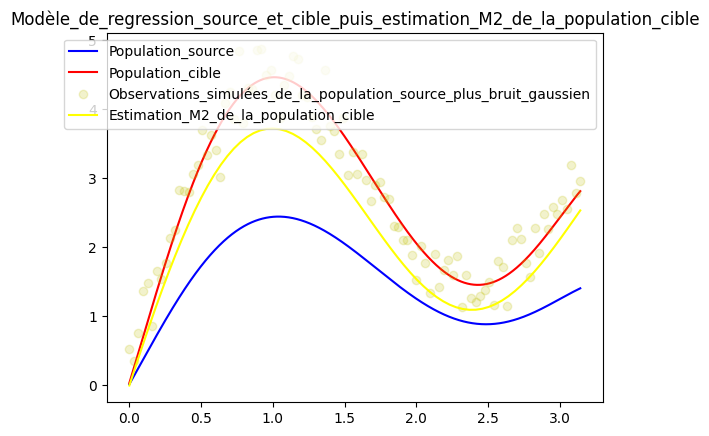

In [8]:
plt.title('Modèle_de_regression_source_et_cible_puis_estimation_M2_de_la_population_cible')
plt.plot(x_smooth, y_ref_smooth, label='Population_source', color='blue')
plt.plot(x_smooth, y_new_smooth, label='Population_cible', color='red')
plt.plot(x_newP , y_newP, "oy",alpha=0.2,label='Observations_simulées_de_la_population_source_plus_bruit_gaussien')
plt.plot(x_P_etoile,y_estim_by_m2,label='Estimation_M2_de_la_population_cible',color='yellow')
plt.legend()
#plt.savefig('C:\\Users\\Etudiant\\Documents\\bouveyron_simulations.png')
plt.show()

#### 3 - Estimateur $M2$ de l’étude de Bouveyron et al. 2010 appliqué aux données polynomiales simulées de l’étude de Obst et AL. 2022


Ce code trace l’estimation du polynome cible de l’étude de Obst et Al. 2022 en utilisant l’estimateur
par transfert de l’étude de Bouveyron et al. 2010

ValueError: x and y must have same first dimension, but have shapes (400,) and (1000,)

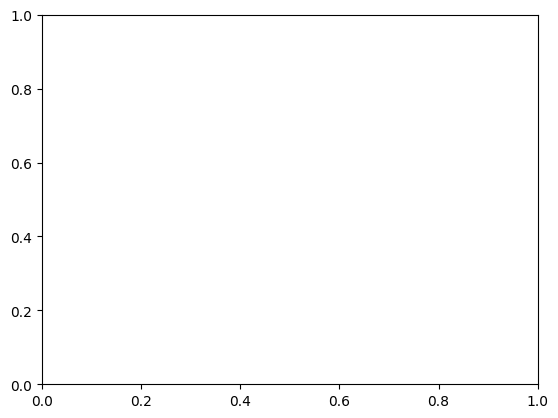

In [10]:
import numpy as np
import random
import math as m
import matplotlib.pyplot as plt

#conception of the target model
Nt=20
D=4
sigma_t=0.5
betat0=-1
betat1=-1.8
betat2=1.2
betat3=1
X_t=np.ones((Nt,D))
x_t=np.ones((Nt,1))
random.seed(a=256, version=2)
for i in range(0,Nt):
    x_t[i,0]=-4*random.random()+1
for j in range(1,D):
    for i in range(0,Nt):
        if j==1:
            X_t[i,j]=x_t[i,0]
        elif j==2:
            X_t[i,j]=(x_t[i,0])**2
        else:
            X_t[i,j]=(x_t[i,0])**3
big_sigma_t=np.matmul(np.transpose(X_t),X_t)
random.seed(a=255, version=2)
epsilon_t=np.ones((Nt,1))
for i in range(Nt):
    epsilon_t[i,0]=random.normalvariate(mu=0.0, sigma=m.sqrt(sigma_t))
beta_t=np.array([[betat0],[betat1],[betat2],[betat3]])
Y_t=X_t@beta_t+epsilon_t

#conception of the source model
Ns=100
D=4
sigma_s=0.5
X_s=np.ones((Ns,D))
x_s=np.ones((Ns,1))
random.seed(a=254, version=2)
for i in range(0,Ns):
    x_s[i,0]=3*random.random()
for j in range(1,D):
    for i in range(0,Ns):
        if j==1:
            X_s[i,j]=x_s[i,0]
        elif j==2:
            X_s[i,j]=(x_s[i,0])**2
        else:
            X_s[i,j]=(x_s[i,0])**3
big_sigma_s=np.matmul(np.transpose(X_s),X_s)
random.seed(a=253, version=2)
epsilon_s=np.ones((Ns,1))
for i in range(Ns):
    epsilon_s[i,0]=random.normalvariate(mu=0.0, sigma=m.sqrt(sigma_s))
random.seed(a=252, version=2)
beta_s=np.array([[betat0 + random.normalvariate(mu=0.0, sigma=0.3)],[betat1 +random.normalvariate(mu=0.0, sigma=0.3) ],[betat2 + random.normalvariate(mu=0.0, sigma=0.3) ],[betat3 + random.normalvariate(mu=0.0, sigma=0.3) ]])
Y_s=X_s@beta_s+epsilon_s

#separate the data betwenn , train set and test set
X_t_train=X_t[0:10,:]
Y_t_train=Y_t[0:10]
Nt_train=np.shape(X_t_train)[0]
X_t_test=X_t[10:21,:]
Y_t_test=Y_t[10:21]
Nt_test=np.shape(X_t_test)[0]
big_sigma_t_train=np.matmul(np.transpose(X_t_train),X_t_train)
beta_s_chap=np.linalg.inv( np.transpose(X_s)@X_s )@( np.transpose(X_s)@Y_s )

#######################BETA_CHAP_FT_PAR_BOUVEYRON######################
###matrice de transformation###
Q=np.ones((len(X_t_train[:,1]),2))
for i in range(len(X_t_train[:,1])):
    Q[i,:]=np.array([beta_s_chap[0],beta_s_chap[1]*X_t_train[i,1] +beta_s_chap[2]*X_t_train[i,1]**2 + beta_s_chap[3]*X_t_train[i,1]**3]).squeeze()
tsf_matrix_m2=np.linalg.inv(np.transpose(Q)@Q)@np.transpose(Q)@Y_t_train
#parametre beta_etoile de la nouvelle population
beta_chap_FT_Bouveyron=np.concatenate((np.array([tsf_matrix_m2[0]*beta_s_chap[0]]) ,tsf_matrix_m2[1]*beta_s_chap[1:len(beta_s_chap)+1] ))
y_estim_by_M2=beta_chap_FT_Bouveyron[0] + beta_chap_FT_Bouveyron[1]*x +beta_chap_FT_Bouveyron[2]*x**2 + beta_chap_FT_Bouveyron[3]*x**3
x = np.linspace(-3, 3, 400)
plt.plot(x,y_estim_by_M2)